### yolov3 bounding box

In [64]:
import json
import os
import numpy as np
from tensorflow import random # random seed 설정용
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [65]:
path = '[라벨]General_train_B_1/district/'
direct = os.listdir(path)
folder = []
for d in direct:
    folder.append(path+d)
#print(folder)

In [66]:
get_on = []
get_off = []
keys = []

for f in folder:
    path = f+'/'
    for i in os.listdir(path):
        with open(path+i,'r') as f:
            info = json.load(f)
            for i in range(len(info['annotations'])):
                if len(info['annotations'][i]) == 0: pass
                else: 
                    annotations = info['annotations'][i]
                    keypoints = annotations.get('keypoints')
                    #print(keypoints)
                    keys.append(keypoints)
                    get_on.append(annotations.get('get_on'))
                    get_off.append(annotations.get('get_off'))

In [67]:
print(len(keys))

26338


In [68]:
keys = np.array(keys).reshape(-1,16,1,3)

In [69]:
keys.shape

(26338, 16, 1, 3)

In [70]:
target = []

for i in range(len(get_on)):
    if get_on[i] == True: target.append(0)
    elif get_off[i] == True: target.append(1)
    elif (get_on[i] == False) and (get_off[i] == False): target.append(2)

In [71]:
target = np.array(target).reshape(-1,1)
target.shape

(26338, 1)

In [72]:
# 8:2 비율
train_X, test_X, train_y, test_y = train_test_split(keys, target,
                                                  stratify=target,
                                                  test_size=0.2,
                                                  random_state=11)

In [73]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y,
                                                  stratify=train_y,
                                                  test_size=0.2,
                                                  random_state=11)

In [74]:
train_X.shape, test_X.shape, val_X.shape

((16856, 16, 1, 3), (5268, 16, 1, 3), (4214, 16, 1, 3))

방법1. CNN

---

In [75]:
random.set_seed(11)

In [76]:
model=Sequential()
model.add(Conv2D(3, kernel_size=3, padding='same', input_shape=(16, 1, 3))) # 3차원
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax')) # 1차원

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 16, 1, 3)          84        
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3,415
Trainable params: 3,415
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 검증 데이터에 대한 loss 값이 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss', patience=3)

In [79]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [80]:
hist = model.fit(train_X, train_y,
                 batch_size=36,
                 validation_data = (val_X, val_y),
                 epochs=20,
                 callbacks=[stopCB])

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 7.7485 - accuracy: 0.8144 - val_loss: 0.4373 - val_accuracy: 0.8859
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4764 - accuracy: 0.8548 - val_loss: 0.3272 - val_accuracy: 0.9010
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4034 - accuracy: 0.8657 - val_loss: 0.3190 - val_accuracy: 0.8944
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3823 - accuracy: 0.8685 - val_loss: 0.3190 - val_accuracy: 0.9020
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3727 - accuracy: 0.8726 - val_loss: 0.2887 - val_accuracy: 0.9041
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3626 - accuracy: 0.8738 - val_loss: 0.2841 - val_accuracy: 0.9048
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3619 - accuracy: 0.8752 - val_loss: 0.2853 - val_accuracy: 0.9082
Epoch 

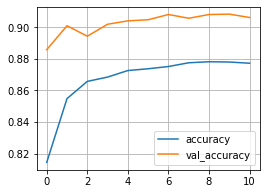

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.plot(hist.epoch, hist.history['accuracy'])
plt.plot(hist.epoch, hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [82]:
model.evaluate(test_X, test_y)

165/165 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8960


[0.30939385294914246, 0.8959757089614868]

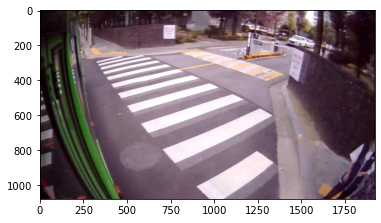

In [83]:
import cv2

img = cv2.imread('[apt]attend_1140A_51.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 이미지 색 변환
resize_img = cv2.resize(img, (224, 224), fx=0.3, fy=0.7, interpolation=cv2.INTER_AREA) 
resize_img = np.array(resize_img)
resize_img.shape
plt.imshow(img)
plt.show()

In [84]:
test1 = [
                1729,
                1037,
                0,
                1694,
                1036,
                2,
                1778,
                946,
                2,
                1822,
                980,
                2,
                1738,
                1056,
                2,
                1809,
                1050,
                0,
                1794,
                962,
                2,
                1866,
                870,
                2,
                1904,
                816,
                2,
                1836,
                713,
                0,
                1776,
                930,
                2,
                1804,
                848,
                2,
                1870,
                780,
                2,
                1908,
                848,
                0,
                1896,
                926,
                2,
                1860,
                930,
                2
            ]

In [85]:
result1 = model.predict(np.array(test1).reshape(-1,16,1,3))

1/1 [==============================] - 0s 150ms/step


In [86]:
pre_val = ['get_on', 'get_off', 'nothing']
print('예측: {}, 실제: {}'.format(pre_val[result1.argmax()], pre_val[2]))
print(round(result1[0][2]*100,2),'%')

예측: nothing, 실제: nothing
94.55 %


방법2. LSTM

---

In [87]:
random.set_seed(11)

In [88]:
train_X.reshape(-1,16,3).shape

(16856, 16, 3)

In [89]:
model2 = Sequential()

In [90]:
model2.add(LSTM(128, activation='tanh', input_shape=train_X[0].reshape(-1,3).shape))
model2.add(Dense(3, activation='softmax'))

In [91]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67584     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 67,971
Trainable params: 67,971
Non-trainable params: 0
_________________________________________________________________


In [92]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [93]:
hist2 = model2.fit(train_X.reshape(-1,16,3), train_y,
                 batch_size=36,
                 validation_data = (val_X.reshape(-1,16,3), val_y),
                 epochs=20,
                 callbacks=[stopCB])

Epoch 1/20
469/469 [==============================] - 16s 25ms/step - loss: 0.4765 - accuracy: 0.8132 - val_loss: 0.4249 - val_accuracy: 0.8322
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.4029 - accuracy: 0.8459 - val_loss: 0.4067 - val_accuracy: 0.8405
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3795 - accuracy: 0.8553 - val_loss: 0.3984 - val_accuracy: 0.8474
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3650 - accuracy: 0.8638 - val_loss: 0.3831 - val_accuracy: 0.8595
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3563 - accuracy: 0.8698 - val_loss: 0.3384 - val_accuracy: 0.8745
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3495 - accuracy: 0.8710 - val_loss: 0.3521 - val_accuracy: 0.8761
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.3568 - accuracy: 0.8688 - val_loss: 0.3535 - val_accuracy: 

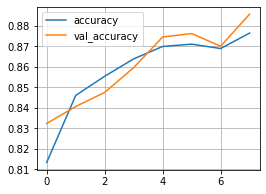

In [94]:
plt.figure(figsize=(4,3))
plt.plot(hist2.epoch, hist2.history['accuracy'])
plt.plot(hist2.epoch, hist2.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [95]:
model2.evaluate(test_X.reshape(-1,16,3), test_y)

165/165 [==============================] - 2s 9ms/step - loss: 0.3464 - accuracy: 0.8833


[0.3464324176311493, 0.8832573890686035]

In [96]:
result2 = model2.predict(np.array(test1).reshape(-1,16,3))

1/1 [==============================] - 1s 1s/step


In [97]:
pre_val = ['get_on', 'get_off', 'nothing']
print('예측: {}, 실제: {}'.format(pre_val[result2.argmax()], pre_val[2]))
print(round(result2[0][2]*100,2),'%')

예측: nothing, 실제: nothing
97.32 %
